**DATAANALYS**
- **1.1 EDA**
- **1.2 Data Cleaning** 

**1.1 EDA**

**The code first brings in necessary libraries for analyzing data and doing machine learning. Then, it reads data from a CSV file, shows the initial rows of the dataset, and summarizes the types of data and any missing values**

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
df = pd.read_csv("asset/cardio_train.csv", sep=";")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
df.info

<bound method DataFrame.info of           id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  \
0          0  18393       2     168    62.0    110     80            1     1   
1          1  20228       1     156    85.0    140     90            3     1   
2          2  18857       1     165    64.0    130     70            3     1   
3          3  17623       2     169    82.0    150    100            1     1   
4          4  17474       1     156    56.0    100     60            1     1   
...      ...    ...     ...     ...     ...    ...    ...          ...   ...   
69995  99993  19240       2     168    76.0    120     80            1     1   
69996  99995  22601       1     158   126.0    140     90            2     2   
69997  99996  19066       2     183   105.0    180     90            3     1   
69998  99998  22431       1     163    72.0    135     80            1     2   
69999  99999  20540       1     170    72.0    120     80            2     1   

       

In [6]:
"""Age values are converted to years by dividing them by 365,and then the existing column
 is updated with these new values."""

df["age"] = df["age"]// 365
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [7]:
"""Returns a tuple showing the number of rows and columns in the dataset"""
df.shape

(70000, 13)

In [8]:
"""Provides a summary statistical analysis"""
df.describe()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


**1.1.A. How many are positive for cardiovascular disease and how many are negative?**

In [9]:
"""The number of positive and negative cases of heart disease is determined by segregating them based 
on the value of "cardio" """

# Calculate and display the occurrence of cardiovascular disease in the dataset
pos_heart_disease = len(df[df["cardio"] == 1])
neg_heart_disease = len(df[df["cardio"] == 0])
print(f"\nHeart disease: Positives:{pos_heart_disease} Negatives:{neg_heart_disease}")


Heart disease: Positives:34979 Negatives:35021


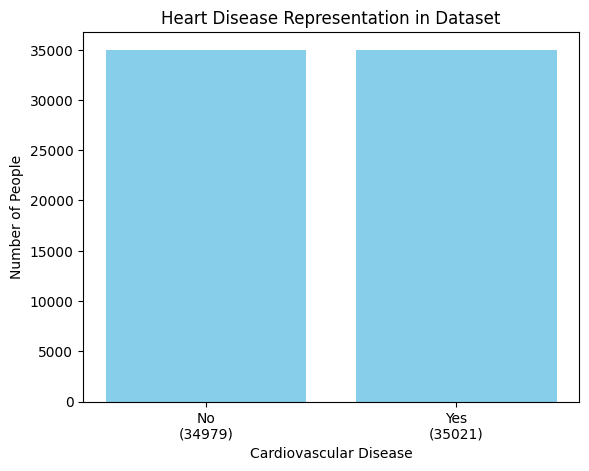

In [10]:

"""Visualization of a bar chart showing the occurrence of heart 
disease: the number of positive and negative cases."""

# Create a list with the number of cases
heart_disease_counts = [pos_heart_disease, neg_heart_disease]

# Create a bar plot
labels=[f"No\n({heart_disease_counts[0]})", f"Yes\n({heart_disease_counts[1]})"]
plt.bar(labels, heart_disease_counts,color="skyblue")

# Adjust plot title and labels
plt.title("Heart Disease Representation in Dataset")
plt.xlabel("Cardiovascular Disease")
plt.ylabel("Number of People")

# Show the plot
plt.show()

**1.1.B. What proportion have normal, above normal, and significantly above normal cholesterol levels?**

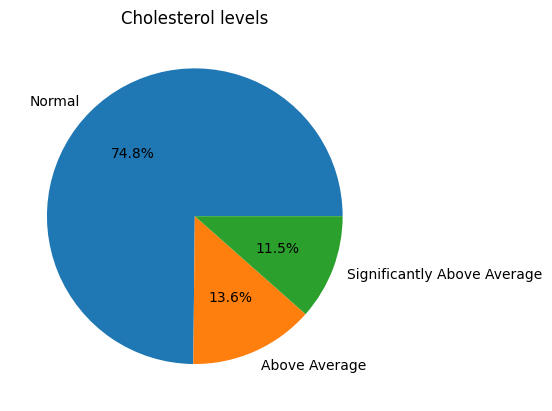

In [11]:
"""Visualization of the distribution of different cholesterol levels in the dataset as a pie chart."""

# Plot the proportion of normal, above average, and significantly above average cholesterol levels
sizes = df["cholesterol"].value_counts(normalize=True)
labels = ["Normal", "Above Average", "Significantly Above Average"]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title("Cholesterol levels")
plt.show()

**1.1.C. What does the age distribution look like?**

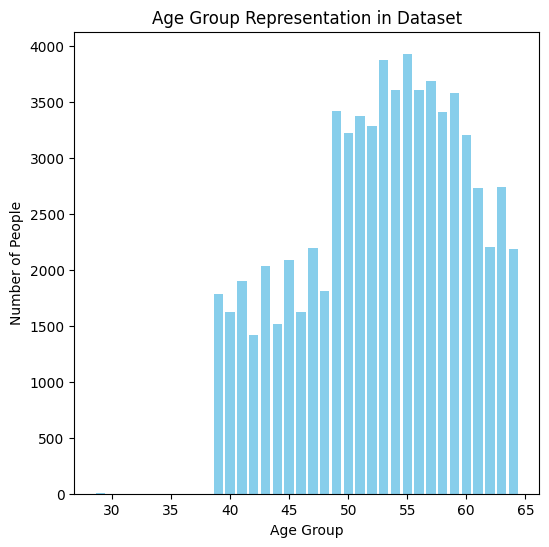

In [12]:
"""Visualization of the distribution of age groups in the dataset through a bar chart"""

# Plot age distribution
age_group = df["age"].value_counts()
# Create a bar plot to show the number of observations for each unique value of "age"
plt.figure(figsize=(6, 6))
plt.bar(age_group.index, age_group, color="skyblue")
plt.title("Age Group Representation in Dataset")
plt.xlabel("Age Group")
plt.ylabel("Number of People")
plt.show()

**1.1.D. What is the smoking prevalence?**

In [13]:
"""Calculation of the proportions of smokers and non-smokers in the population and presenting 
them as percentages."""

# Calculate the proportion of smokers
non_smoker_count = len(df[df["smoke"] == 0])
smoker_count = len(df[df["smoke"] == 1])
print(f"\nSmoking Rate: Smokers: {(smoker_count / len(df)) * 100:.1f}%, Non-smokers: {(non_smoker_count / len(df)) * 100:.1f}%")


Smoking Rate: Smokers: 8.8%, Non-smokers: 91.2%


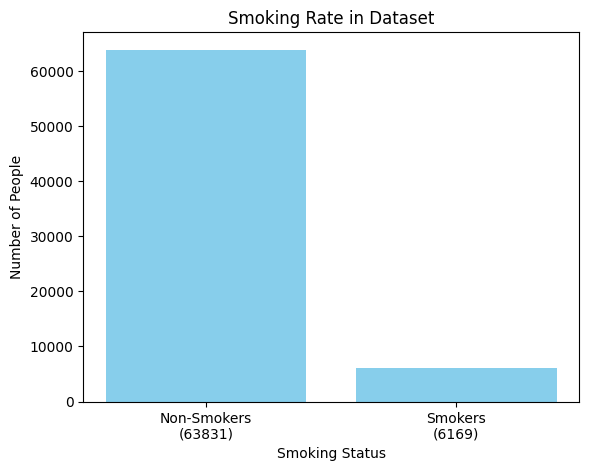

In [14]:
"""Visualization of a bar chart showing the number of non-smokers and smokers"""

# Create a bar plot
labels = [f"Non-Smokers\n({non_smoker_count})", f"Smokers\n({smoker_count})"]
counts = [non_smoker_count, smoker_count]  
plt.bar(labels, counts, color=["skyblue"])

# Adjust plot title and labels
plt.title("Smoking Rate in Dataset")
plt.xlabel("Smoking Status")
plt.ylabel("Number of People")

# Show the plot
plt.show()

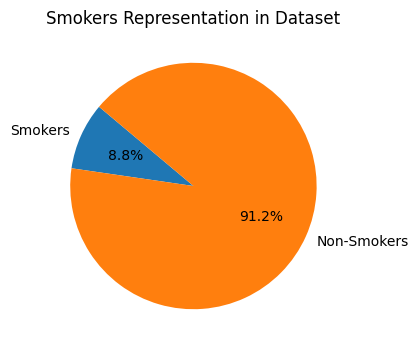

In [15]:
"""The pie chart visualizes the proportion of smokers and non-smokers as a percentage of
 the total population."""

# Create a pie chart to visualizes the percentages for each unique value of "age" with improved numbers
plt.figure(figsize=(4, 4))
plt.pie([smoker_count, non_smoker_count], labels=["Smokers", "Non-Smokers"], autopct="%1.1f%%", startangle=140)
plt.title("Smokers Representation in Dataset")
plt.show()

**1.1.E. What does the weight distribution look like?**

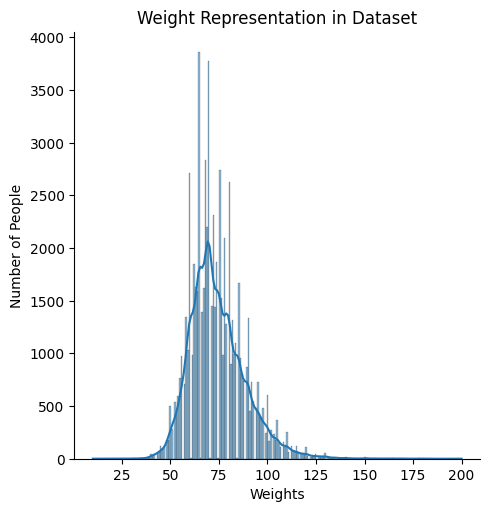

In [16]:
"""Visualization of the distribution plot of weights in the dataset with KDE, followed by 
adjusting the title and axis labels before displaying the plot."""

# Create a distribution plot using seaborn
sns.displot(df["weight"], kde=True)
# Set plot title
plt.gca().set(title="Weight Representation in Dataset", xlabel="Weights", ylabel="Number of People")
# Show the plot
plt.show()

**1.1.F How is the distribution of height?**

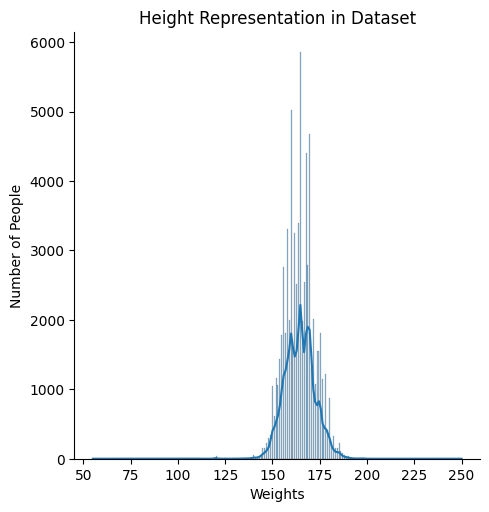

In [17]:
"""Visualization of the distribution plot of heights in the dataset with KDE, followed by adjusting 
the title and axis labels before displaying the plot"""

# Create a distribution plot using seaborn
sns.displot(df["height"], kde=True)
# Set plot title
plt.gca().set(title="Height Representation in Dataset", xlabel="Weights", ylabel="Number of People")
# Show the plot
plt.show()

**1.1.G. What proportion of women and men have cardiovascular disease?**

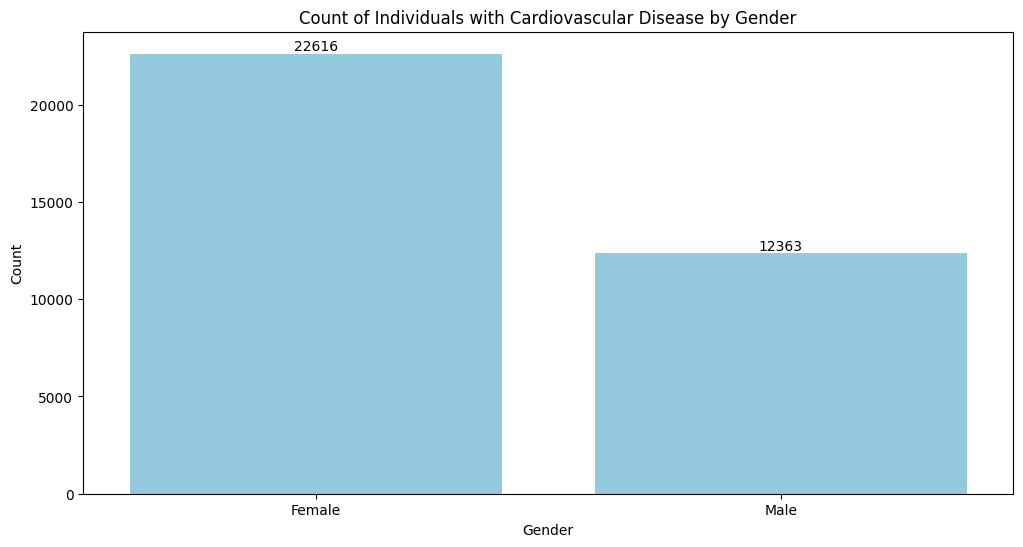

In [18]:
"""Visualization of the distribution of cardiovascular disease among genders using a bar chart,
 enabling comparisons of disease frequency between different genders."""

# Calculate the number of individuals with cardiovascular disease by gender
cardio_by_gender = df.groupby("gender")["cardio"].sum()

# Visualize the number of individuals with cardiovascular disease by gender
plt.figure(figsize=(12, 6))
sns.barplot(x=cardio_by_gender.index.map({1: "Female", 2: "Male"}), y=cardio_by_gender.values, color="skyblue")
plt.title("Count of Individuals with Cardiovascular Disease by Gender")
plt.ylabel("Count")
plt.xlabel("Gender")

# Annotate the number of individuals on each bar
for x, y in zip(range(len(cardio_by_gender)), cardio_by_gender.values):
    plt.text(x, y, f"{y}", ha="center", va="bottom")

# Show the plot
plt.show()


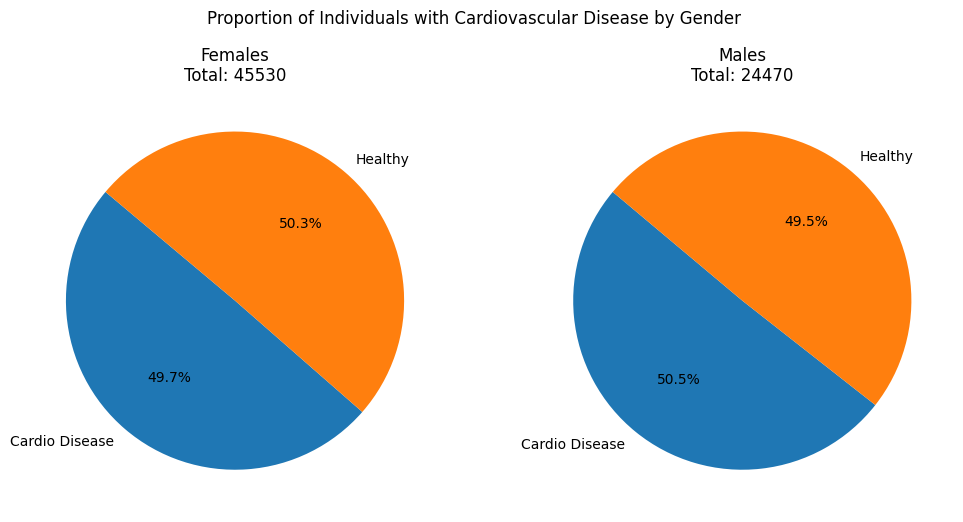

In [19]:
"""Pie chart to illustrate the proportion of individuals with cardiovascular disease based on gender,
 allowing a comparison of disease frequency between genders and providing further insights into the
    prevalence of the disease."""

# Calculate the number of individuals with cardiovascular disease by gender
cardio_by_gender = df.groupby("gender")["cardio"].sum()

# Get the number of females and males
count_by_gender = df["gender"].value_counts()
num_females = count_by_gender.get(1, 0)
num_males = count_by_gender.get(2, 0)

# Visualize the counts of individuals with cardiovascular disease by gender as pie charts
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for females
axs[0].pie([cardio_by_gender.get(1, 0), num_females - cardio_by_gender.get(1, 0)], labels=["Cardio Disease", "Healthy"], autopct="%1.1f%%", startangle=140)
axs[0].set_title("Females\nTotal: {}".format(num_females))

# Pie chart for males
axs[1].pie([cardio_by_gender.get(2, 0), num_males - cardio_by_gender.get(2, 0)], labels=["Cardio Disease", "Healthy"], autopct="%1.1f%%", startangle=140)
axs[1].set_title("Males\nTotal: {}".format(num_males))

plt.suptitle("Proportion of Individuals with Cardiovascular Disease by Gender")
plt.show()

**1.2 Model Design**

**Create a heatmap of correlations in the data**

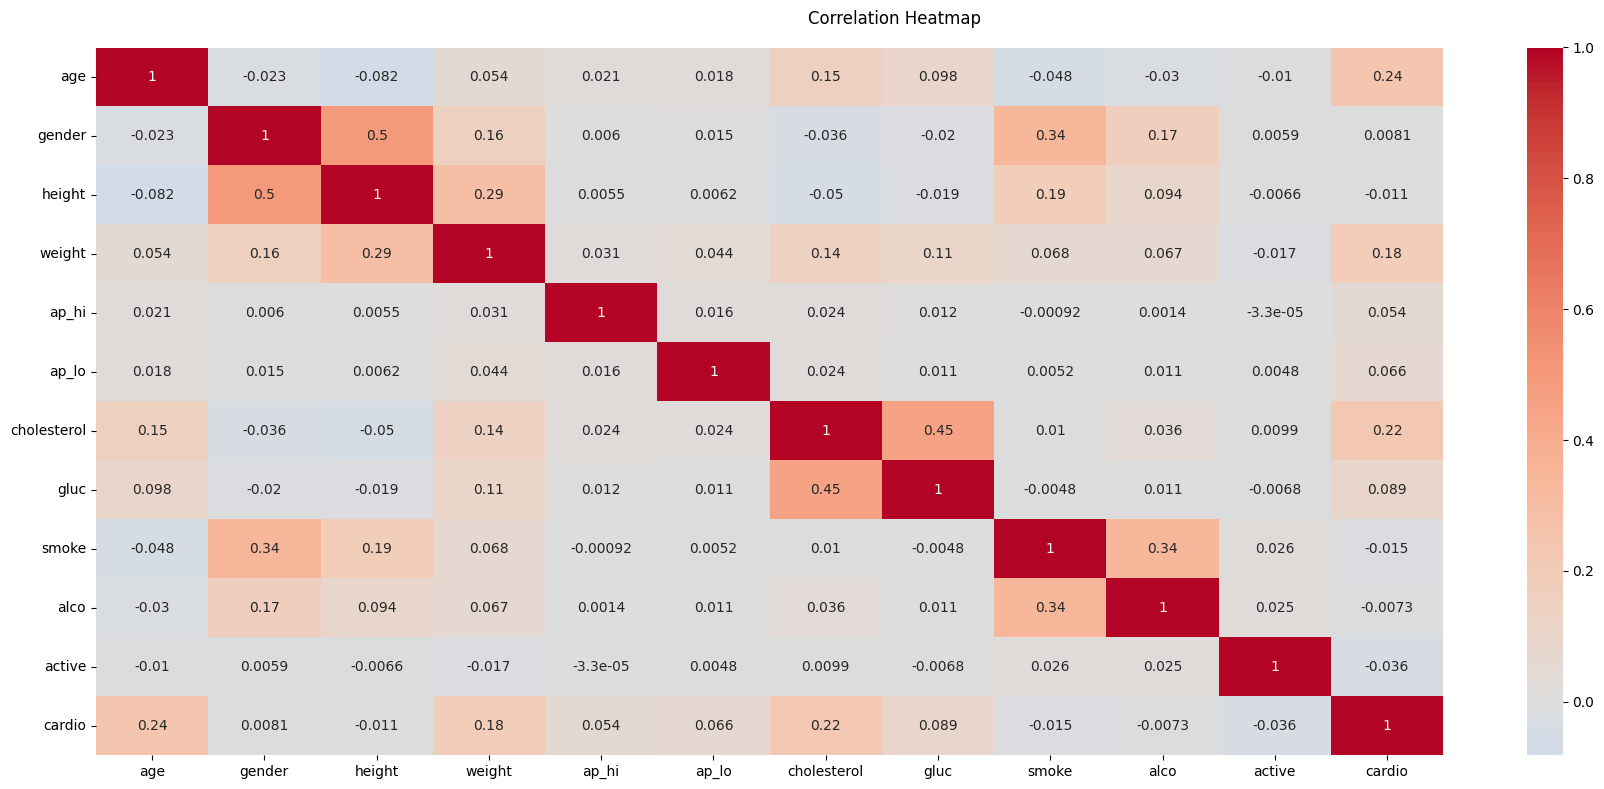

In [20]:
"""Visualization: "One-hot encoding" of a heatmap shows the correlations between different features 
in the dataset, including age, gender, height, weight, blood pressure, cholesterol, glucose, smoking,
 alcohol consumption, physical activity, and cardiovascular disease. The result provides insights into 
 strong correlations between certain factors, such as weight and cholesterol, as well as age and 
 cardiovascular disease."""

# Visualize correlations
df.drop(columns=["id"], inplace=True)
plt.figure(figsize=[18, 8])

corr = df.corr()
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True) 
plt.suptitle('Correlation Heatmap')
plt.tight_layout()



**1.2.1 Feature Engineering**

**1.2.1.A. Discard the samples with unrealistic BMIs and outliers. Note that this may be difficult to determine the range of BMIs to keep. Describe how you arrive at the boundaries, with reasoning or references**

In [21]:
"""Computes and adds BMI (Body Mass Index) for each individual in the dataset by performing a 
calculation where weight in kilograms is divided by height in meters squared, resulting in a 
new column named "bmi"."""

# Calculate BMI
df["bmi"] = df["weight"] / (df["height"] / 100) ** 2

In [22]:
"""Computes the mean and standard deviation for BMI (Body Mass Index) from the dataset. 
Then, thresholds for outliers are defined based on standard deviations. Finally, the dataset is
 filtered to exclude any outliers lying outside the defined thresholds."""

# Calculate mean and standard deviation for BMI
mean_bmi = df["bmi"].mean()
std_bmi = df["bmi"].std()

# Define cutoff points for outliers based on standard deviation
lower_cutoff = mean_bmi - 3 * std_bmi
upper_cutoff = mean_bmi + 3 * std_bmi

# Remove outliers
df = df[(df["bmi"] >= lower_cutoff) & (df["bmi"] <= upper_cutoff)]

**1.2.1.B Create a categorical BMI feature with the categories: normal range, overweight, obese (class I), obese (class II), obese (class III)**

In [37]:
"""Labels are created and assigned to different BMI categories based on specific BMI thresholds, 
such as Underweight, Normal weight, Overweight, Obesity class I, Obesity class II, and Obesity class III.
 Then, these categories are added to the dataset to count and sort the number of observations for each
   BMI category, providing insights into the distribution of BMI values within the dataset"""

# Definition of boundaries for different BMI categories
bmi_conditions = [
    (df["bmi"] < 18.5),                         # Under weight: Label 0
    (df["bmi"] >= 18.5) & (df["bmi"] < 25.0),   # Normal Weight: Label 1
    (df["bmi"] >= 25.0) & (df["bmi"] < 30.0),   # Pre-obesity: Label 2
    (df["bmi"] >= 30.0) & (df["bmi"] < 35.0),   # Obesity Class I: Label 3
    (df["bmi"] >= 35.0) & (df["bmi"] < 40.0),   # Obesity Class II: Label 4
    (df["bmi"] >= 40.0)                          # Obesity Class III: Label 5
]

bmi_labels = [0, 1, 2, 3, 4, 5]

# Apply the categories to the dataset
df.loc[:, "bmi_category"] = np.select(bmi_conditions, bmi_labels, default=6)
df["bmi_category"].value_counts().sort_index()


bmi_category
0      628
1    25294
2    24469
3    11850
4     4179
5     1286
Name: count, dtype: int64

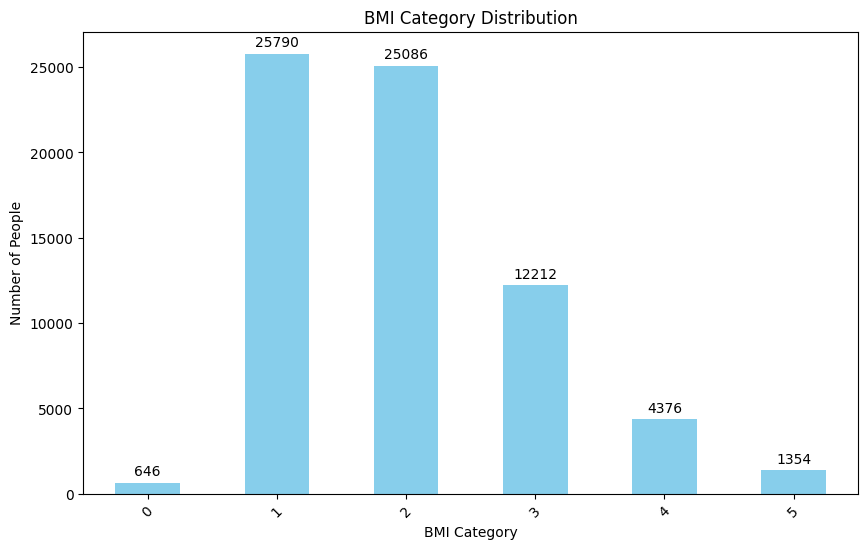

In [24]:
"""Visualization of a bar chart showing the distribution of BMI categories in the dataset. 
The number of individuals in each category is displayed on each bar using f-strings"""

# Plot BMI category distribution
plt.figure(figsize=(10, 6))
ax = df["bmi_category"].value_counts().sort_index().plot(kind='bar', color='skyblue')

# Add number of people on each bar with f-string
for p in ax.containers:
    ax.bar_label(p, labels=[f'{h.get_height():.0f}' for h in p], padding=3)

# Adjust plot title and labels
plt.title('BMI Category Distribution')
plt.xlabel('BMI Category')
plt.ylabel('Number of People')
plt.xticks(rotation=45)

plt.show()

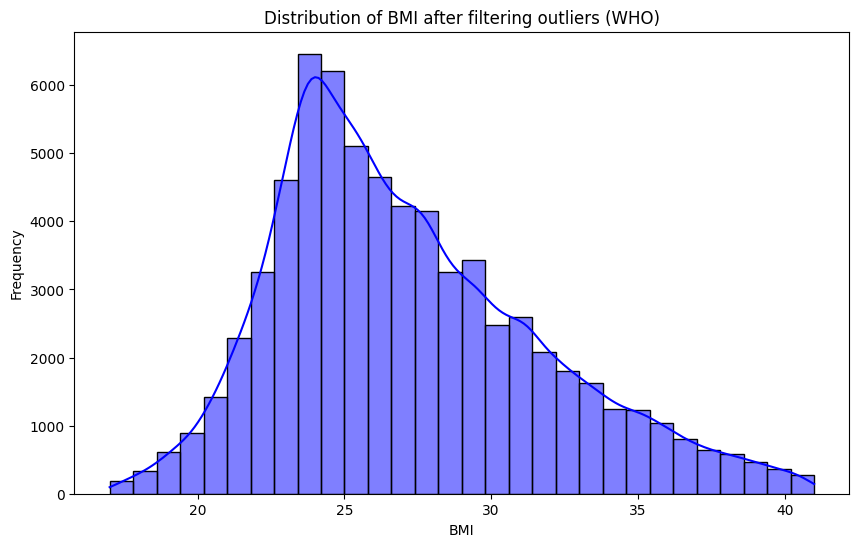

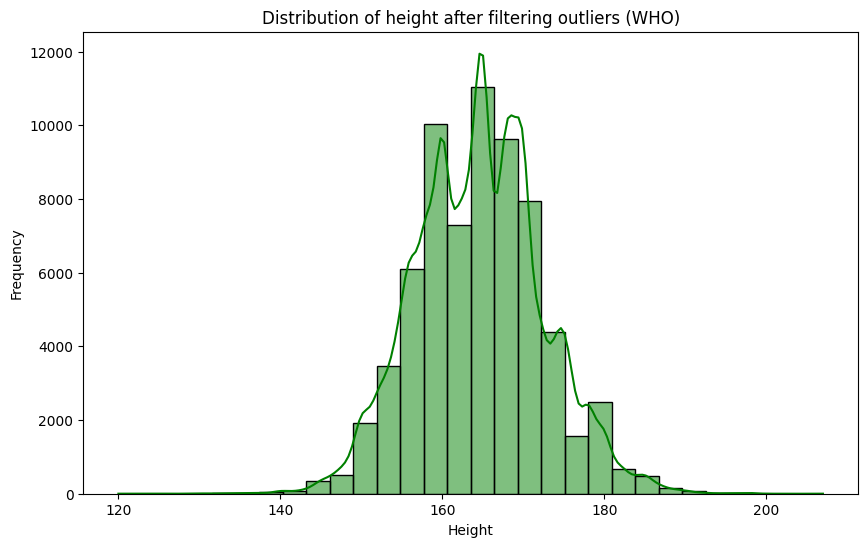

In [25]:
"""A function, filter_outliers_who, is used to filter data where BMI values fall within the
 range of 17 to 41, suggesting any outliers, according to WHO standards, are removed. Then,
   histograms are generated for the distribution of BMI and height for the filtered data to examine
     their distributions after outliers have been removed."""

# Use filter_outliers_who to filter data
filtered_data = df[(df["bmi"] >= 17) & (df["bmi"] <= 41)]  # Adjusted WHO outliers

# Plot BMI distribution
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data["bmi"], kde=True, color="blue", bins=30)
plt.title("Distribution of BMI after filtering outliers (WHO)")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(filtered_data["height"], kde=True, color="green", bins=30)
plt.title("Distribution of height after filtering outliers (WHO)")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.show()

**1.2.1.C Investigate if the category is relevant, i.e., its correlations. Update the data analysis if you find anything interesting**

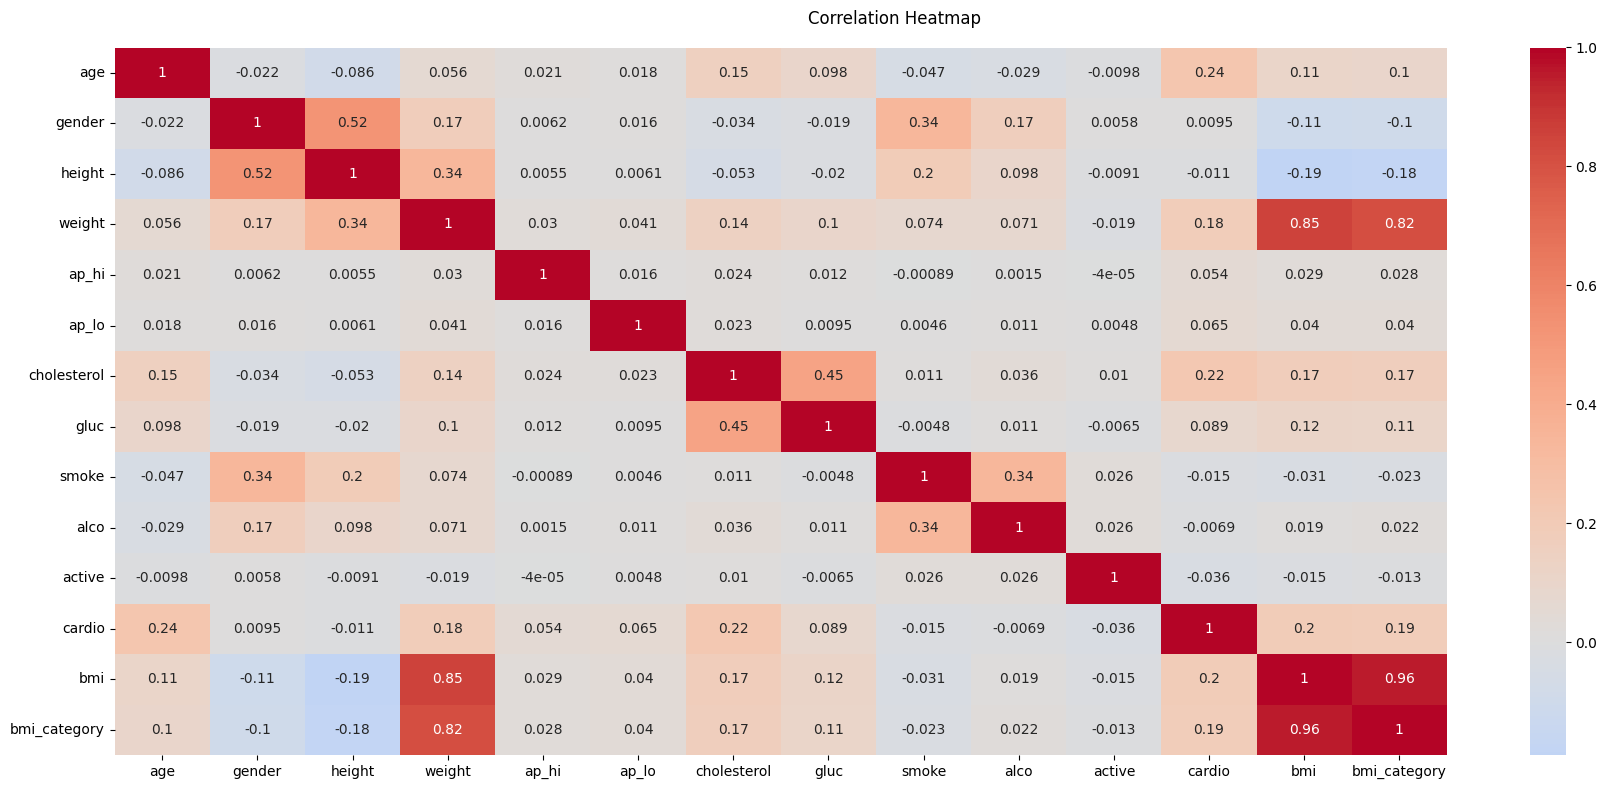

In [26]:
""": Visualization: "One-hot encoding" of a heatmap shows the correlations between different features
 in the dataset, including age, gender, weight, blood pressure, cholesterol levels, and the presence 
 of cardiovascular disease. The analysis results show that BMI has a strong positive correlation with
   weight and blood pressure category but a strong negative correlation with height and BMI category."""


# Use one-hot encoding to convert categorical variables into numerical values
df_encoded = pd.get_dummies(df)

# Create a correlation matrix for the numerical variables
corr = df_encoded.corr()

# Create a heatmap for the new correlation matrix
plt.figure(figsize=[18, 8])
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.suptitle('Correlation Heatmap')
plt.tight_layout()
plt.show()



**1.2.1.D. Remove samples with unrealistic blood pressure values and outliers. Establishing the boundaries for this task, as with the previous one, may pose challenges. Describe the process you will use to determine these boundaries**

In [27]:
"""Filtering the dataset to retain observations where systolic and diastolic blood pressure are within
 specific limits, set between half of the lowest to twice the highest acceptable threshold value."""

# Variable to store the initial length of the dataframe
initial_length = len(df)

# Cutoff points set to half of the low and twice of the severely high threshold
df = df[df["ap_hi"].between(45, 360)]
df = df[df["ap_lo"].between(30, 240)]

In [28]:
"""Computes the mean and standard deviation for both systolic and diastolic blood pressure
 ("ap_hi" and "ap_lo"). This follows statistical principles where mean and standard deviation 
 are used to describe central tendency and spread for a dataset."""

# Calculate the mean and standard deviation for ap_hi and ap_lo
mean_ap_hi = df["ap_hi"].mean()
std_ap_hi = df["ap_hi"].std()

mean_ap_lo = df["ap_lo"].mean()
std_ap_lo = df["ap_lo"].std()

# Define boundaries for outliers based on the number of standard deviations from the mean
lower_cutoff_ap_hi = mean_ap_hi - 3 * std_ap_hi
upper_cutoff_ap_hi = mean_ap_hi + 3 * std_ap_hi

lower_cutoff_ap_lo = mean_ap_lo - 3 * std_ap_lo
upper_cutoff_ap_lo = mean_ap_lo + 3 * std_ap_lo


A dictionary is created with limits for outliers based on the standard deviation method for both systolic and diastolic blood pressure. The result of outliers_dictionary shows the boundaries for outliers for both ap_hi and ap_lo. Additionally, the results show the lower and upper bounds for outliers for both systolic and diastolic blood pressure according to the standard deviation method used. For ap_hi, the lower outlier boundary is 76.43 and the upper boundary is 176.64, while for ap_lo, the lower boundary is 52.35 and the upper boundary is 110.32. This provides a frame of reference for assessing blood pressure deviations and can be useful for identifying potential health risks.

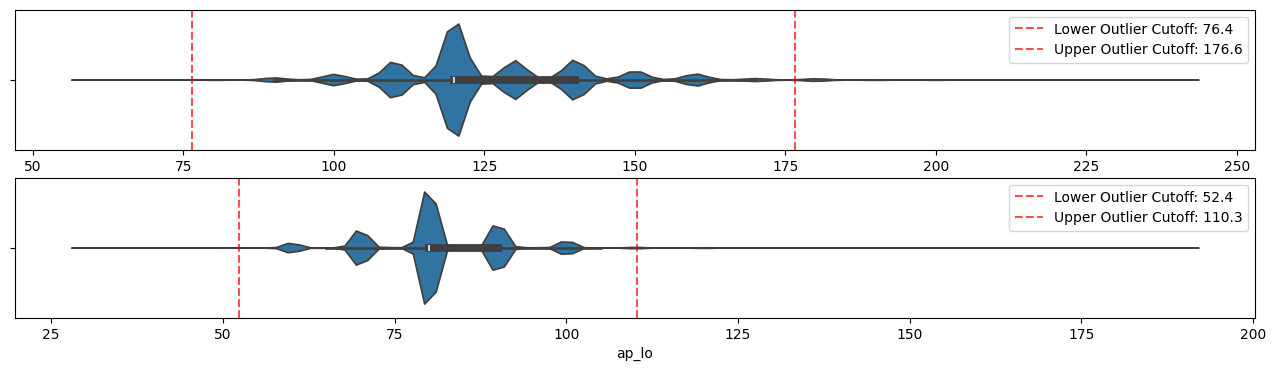

In [29]:
# Create a new dictionary for outliers based on the standard deviation method
outliers_std = {
    "ap_hi": (lower_cutoff_ap_hi, upper_cutoff_ap_hi),
    "ap_lo": (lower_cutoff_ap_lo, upper_cutoff_ap_lo)
}

# Plot outliers using the standard deviation method
fig, axes = plt.subplots(2, 1, figsize=(16, 4))

# Loop through axes and outliers
for ax, ap in zip(axes.flatten(), outliers_std):
    sns.violinplot(x=df[ap], ax=ax)  # Plot ap in ax

    # Plot vertical lines to show outliers
    ax.axvline(outliers_std[ap][0], color="r", linestyle="--", alpha=0.7, label=f"Lower Outlier Cutoff: {outliers_std[ap][0]:.1f}")
    ax.axvline(outliers_std[ap][1], color="r", linestyle="--", alpha=0.7, label=f"Upper Outlier Cutoff: {outliers_std[ap][1]:.1f}")
    ax.legend(loc="upper right")  # Show vertical line legend in the top right corner


Filters on the dataset related to blood pressure measurements. First, the original length of the dataset is computed then measurements where systolic blood pressure is greater than diastolic blood pressure are filtered out. After that, invalid blood pressure measurements are filtered out by only retaining measurements where systolic blood pressure ("ap_hi") is between 90 and 180 mmHg and diastolic blood pressure ("ap_lo") is between 60 and 120 mmHg. Finally, the number of removed data points is calculated.

In [30]:
# Calculate the initial number of data points
initial_length = len(df)

# Filter out measurements where systolic blood pressure is greater than diastolic blood pressure
df = df.query("ap_hi > ap_lo")

# Filter out invalid blood pressure measurements
df = df.query("90 <= ap_hi <= 180 and 60 <= ap_lo <= 120")

# Calculate the number of removed data points
removed_datapoints = initial_length - len(df)
print(f"Datapoints removed: {removed_datapoints}")

Datapoints removed: 566


**1.2.1.E. Create a categorical feature with relevant categories**

In [36]:
"""Defining limits for different categories of blood pressure based on both systolic and diastolic
 blood pressure. The categories include Healthy blood pressure, Elevated blood pressure, 
 Stage 1 hypertension, and Stage 2 hypertension. 
 Then, these categories are applied to the dataset to categorize each observation 
 and calculate the number of observations in each category."""

# Definition of boundaries for different blood pressure categories
category = [
(df["ap_hi"] < 120) & (df["ap_lo"] < 80),  # Healthy: Label 0
 (df["ap_hi"] < 130) & (df["ap_lo"] < 80),  # Elevated: Label 1
(df["ap_hi"] < 140) | (df["ap_lo"] < 90),  # Stage 1 Hypertension: Label 2
 (df["ap_hi"] < 180.1) | (df["ap_lo"] <= 120),  # Stage 2 Hypertension: Label 3 (120 is inclusive)
]

labels = [0, 1, 2, 3]

# Apply the categories to the dataset
df["bp_category"] = np.select(category, labels, 4)
df["bp_category"].value_counts().sort_index()

bp_category
0     9388
1     3082
2    41463
3    13773
Name: count, dtype: int64

**1.2.1F. Examine whether the new category is relevant by assessing its correlation with other variables. Update the data analysis if any meaningful insights are discovered**

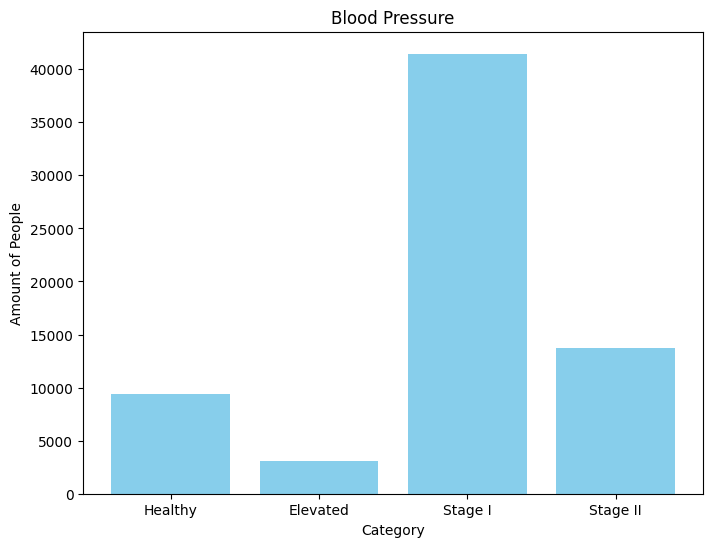

In [32]:
"""Analyzing the distribution of blood pressure categories in the population by counting the number 
of data points for each category and presenting the result as a bar chart. The results show that 
there are 9388 individuals in the Healthy category, 3082 in the Elevated category, 41463 in the Stage 
I category, and 13773 in the Stage II category. This distribution provides insights into the prevalence
 of different blood pressure levels."""

# Count the number of data points for each category and sort by index
category_counts = df["bp_category"].value_counts().sort_index()

# Create a bar chart to visualize the number of data points per category
plt.figure(figsize=(8, 6))
plt.bar(range(len(category_counts)), category_counts.values, color="skyblue")
plt.xlabel("Category")
plt.ylabel("Amount of People")
plt.title("Blood Pressure")
plt.xticks(range(len(category_counts)), ["Healthy", "Elevated", "Stage I", "Stage II"])
plt.show()


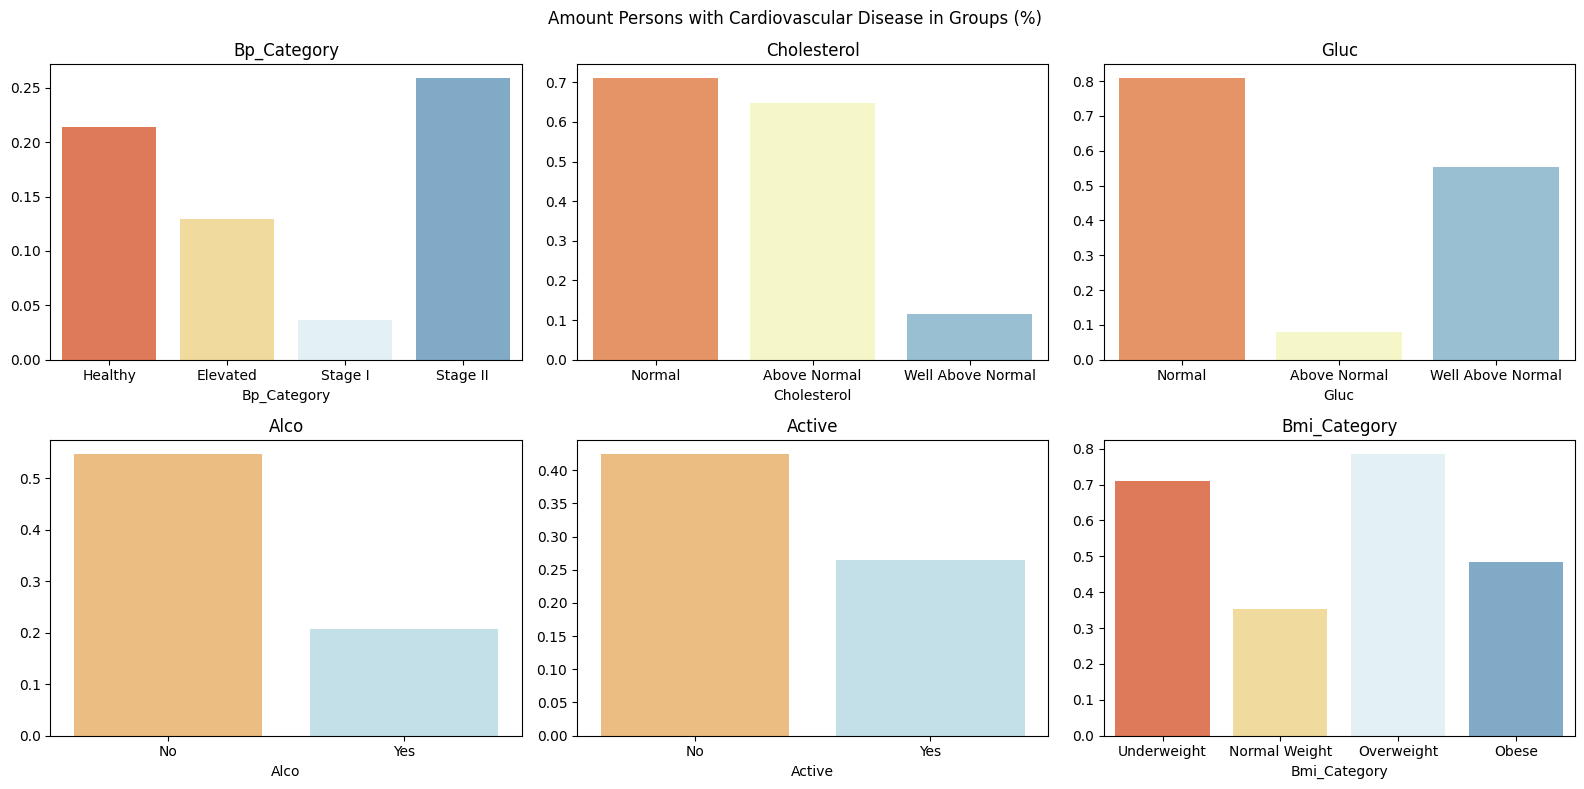

In [33]:
"""Bar chart for different variables and shows the percentage of individuals with cardiovascular 
disease within each variable group. Through this visualization, one can analyze the distribution
 of cardiovascular disease within different variables and identify possible relationships between
   variables and disease occurrence."""

new_cols = {
    "bp_category": ["Healthy", "Elevated", "Stage I", "Stage II"],
    "cholesterol": ["Normal", "Above Normal", "Well Above Normal"],
    "gluc": ["Normal", "Above Normal", "Well Above Normal"],
    "alco": ["No", "Yes"],
    "active": ["No", "Yes"],
    "bmi_category": ["Underweight", "Normal Weight", "Overweight", "Obese"]
}

# create subplots
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

# loop through subplots and columns dictionary
for ax, col in zip(axes.flatten(), new_cols.keys()):  

    # calculate amount with cardiovascular disease based on column (fiktiv data)
    # Here you need to use your own data to calculate the percentage of persons with cardiovascular disease
    data = np.random.rand(len(new_cols[col]))  # Fiktiv data, byt ut med dina egna beräkningar

    # create color palette based on y-values
    palette = sns.color_palette("RdYlBu", len(data)).as_hex()  

    # plot data and color bars based on y-values
    sns.barplot(x=new_cols[col], y=data, palette=palette, ax=ax, hue=new_cols[col], legend=False)  

    # set title and labels
    ax.set_title(col.title())
    ax.set_xlabel(col.title())  

plt.suptitle("Amount Persons with Cardiovascular Disease in Groups (%)")
plt.tight_layout()
plt.savefig("Picture/cardiovascular_disease_groups.png")
plt.show()


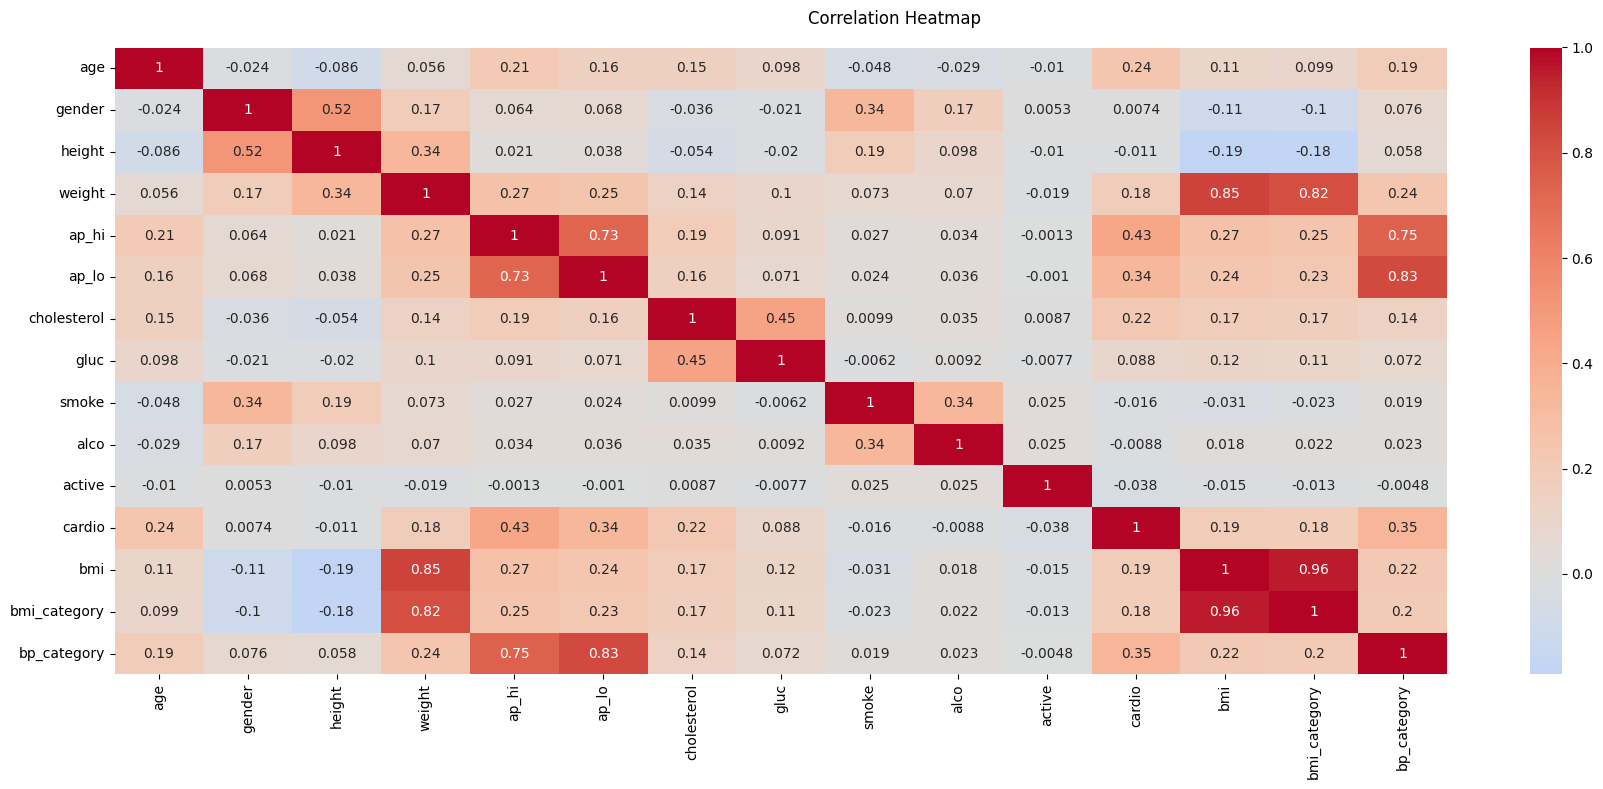

In [35]:
"""One-hot encoding" of a heatmap shows the correlations between different features in the dataset, 
including age, gender, weight, blood pressure, cholesterol levels, and the presence of cardiovascular 
disease. The analysis results show that BMI has a strong positive correlation with weight and blood 
pressure category but a strong negative correlation with height and BMI category."""

# Use one-hot encoding to convert categorical variables into numerical values
df_encoded = pd.get_dummies(df)

# Create a correlation matrix for the numerical variables
corr = df_encoded.corr()

# Create a heatmap for the new correlation matrix
plt.figure(figsize=[18, 8])
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True)
plt.suptitle("Correlation Heatmap")
plt.tight_layout()
plt.savefig("Picture/Correlation Heatmap.png")
plt.show()


**Result:**
- Age (age) and Blood Pressure (ap_hi, ap_lo): Age appears to have a moderate positive correlation with both systolic and diastolic blood pressure. This can be interpreted as age tends to increase along with blood pressure. It is common for blood pressure to rise with age due to increased stiffness in the arteries and other age-related factors.

- Gender (gender) and Height (height): There is a positive correlation between gender and height, as expected because men tend to be taller than women on average. However, the correlation is not extremely high, indicating there is variation within gender regarding height.

- Weight (weight) and BMI (bmi): Weight has a strong positive correlation with BMI, as expected because BMI is calculated as weight divided by the square of height. This means that increases in weight typically result in higher BMI values.

- Cholesterol level (cholesterol) and Glucose level (gluc): There appears to be a positive correlation between cholesterol and glucose levels, which may be expected because both are biomarkers for metabolic conditions, and there are some common risk factors and diseases that affect them.


**Saved dataset**

**Data analysis is finished, and the DataFrame has been saved as a cleaned CSV file**

In [ ]:
df.to_csv("asset/dataset_cleaned.csv", index=False)

print("Data analysis complete. The cleaned dataset has been saved as 'cardio_train_cleaned.csv'.")

Data analysis complete. The cleaned dataset has been saved as 'cardio_train_cleaned.csv'.
